# 3b1f: input dataset

**Motivation:** I'm trying to demonstrate the point "3b1f was the easiest dataset for the reweighting" 

In [58]:
import uproot
import numpy as np
import matplotlib.pyplot as plt


import os
os.sys.path += ['../PyATLASstyle/','../../hh4b/hh4b-plots/','../gp-for-flows/'] 

# Let's do ATLAS style plots too!
import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

from hh4b_plots.colors import *

In [59]:
from bkgPred import mhh_bins

In [40]:
f = uproot.open("../data/RR/NR-UNBLIND-FEB22-1/data16.root")

In [42]:
t = f['sig']

In [43]:
# t.keys()

In [44]:
cols = ['pass_vbf_sel',
 'ntag',
  'minQ',
 'X_hh',
 'kinematic_region',
 'm_hh_cor',
 'm_hh',
 'pt_hh',
 'dEta_hh',
 'X_wt_tag',
 'm_h1',
 'E_h1',
 'pT_h1',
 'eta_h1',
 'phi_h1',
 'm_h2',
 'E_h2',
 'pT_h2',
 'eta_h2',
 'phi_h2',
]

In [45]:
df = t.arrays(cols,library='pd')
df = df[~df.pass_vbf_sel][cols[1:]]

In [46]:
df.keys()

Index(['ntag', 'minQ', 'X_hh', 'kinematic_region', 'm_hh_cor', 'm_hh', 'pt_hh',
       'dEta_hh', 'X_wt_tag', 'm_h1', 'E_h1', 'pT_h1', 'eta_h1', 'phi_h1',
       'm_h2', 'E_h2', 'pT_h2', 'eta_h2', 'phi_h2'],
      dtype='object')

<ipython-input-66-840362ed7214>:20: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(xx,n_3b/n_2b,color='hdbs:outrageousorange',marker='o',lw=0)
<ipython-input-66-840362ed7214>:21: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(xx,n_4b/n_2b,color='hh:darkblue',marker='o',lw=0)


(200.0, 1200.0)

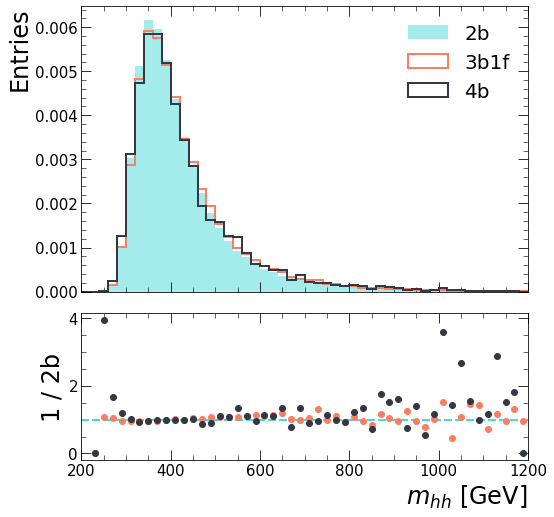

In [66]:
r = (200, 1200)
lw=2

fig, (ax1,ax2) = plt.subplots(figsize=(8,10),nrows=2,sharex=True,
                                  gridspec_kw={"height_ratios": [.66,.34],
                                               "hspace":0.1, "bottom":0.25})

n_2b,e,_ = ax1.hist(df.loc[df.ntag==2,'m_hh'],50,r,label='2b',
                    color='hh:lightturquoise',density=True,alpha=.5,
                   )

n_3b = ax1.hist(df.loc[(df.ntag==3)&(df.minQ==1),'m_hh'],e,label='3b1f',
         density=True,histtype='step',lw=lw,color='hdbs:outrageousorange')[0]
n_4b = ax1.hist(df.loc[(df.ntag>=4),'m_hh'],e,label='4b',
         density=True,histtype='step',lw=lw,color='hh:darkblue')[0]

xx = .5 * (e[1:] + e[:-1])

ax2.plot(r,[1]*2,'hh:lightturquoise',ls='--',lw=lw)
ax2.plot(xx,n_3b/n_2b,color='hdbs:outrageousorange',marker='o',lw=0)
ax2.plot(xx,n_4b/n_2b,color='hh:darkblue',marker='o',lw=0)

ax1.legend(fontsize=20)
ax2.set_xlabel('$m_{hh}$ [GeV]',loc='right',fontsize=24)
ax1.set_ylabel('Entries',loc='top',fontsize=24)
ax2.set_ylabel('1 / 2b',fontsize=24)
ax1.set_xlim(r)

OK - what this plot is saying to me, is the mHH distribution might be looking worse b/c I'm not using variable width bins for mHH.

(280.0, 1020.0)

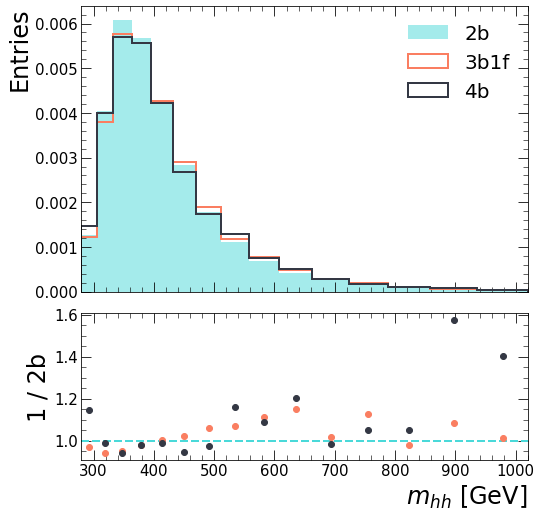

In [67]:
e = mhh_bins
r = e[[0,-1]]

#w = e[1:] - e[:-1]

fig, (ax1,ax2) = plt.subplots(figsize=(8,10),nrows=2,sharex=True,
                                  gridspec_kw={"height_ratios": [.66,.34],
                                               "hspace":0.1, "bottom":0.25})

n_2b,e,_ = ax1.hist(df.loc[df.ntag==2,'m_hh'],e,label='2b',
                    color='hh:lightturquoise',density=True,alpha=.5,
                   )

n_3b = ax1.hist(df.loc[(df.ntag==3)&(df.minQ==1),'m_hh'],e,label='3b1f',
         density=True,histtype='step',lw=lw,color='hdbs:outrageousorange')[0]
n_4b = ax1.hist(df.loc[(df.ntag>=4),'m_hh'],e,label='4b',
         density=True,histtype='step',lw=lw,color='hh:darkblue')[0]

xx = .5 * (e[1:] + e[:-1])

ax2.plot(r,[1]*2,'hh:lightturquoise',ls='--',lw=lw)
ax2.plot(xx,n_3b/n_2b,color='hdbs:outrageousorange',marker='o',lw=0)
ax2.plot(xx,n_4b/n_2b,color='hh:darkblue',marker='o',lw=0)

ax1.legend(fontsize=20)
ax2.set_xlabel('$m_{hh}$ [GeV]',loc='right',fontsize=24)
ax1.set_ylabel('Entries',loc='top',fontsize=24)
ax2.set_ylabel('1 / 2b',fontsize=24)
ax1.set_xlim(r)